C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.8226 - loss: 0.5737 - val_accuracy: 0.9825 - val_loss: 0.0605
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9747 - loss: 0.0874 - val_accuracy: 0.9887 - val_loss: 0.0418
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.9820 - loss: 0.0594 - val_accuracy: 0.9875 - val_loss: 0.0460
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.9848 - loss: 0.0471 - val_accuracy: 0.9892 - val_loss: 0.0382
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.9884 - loss: 0.0387 - val_accuracy: 0.9902 - val_loss: 0.0362
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.9898 - loss: 0.0318 - val_accuracy: 0.9910 - val_loss: 0.0358
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.9917 - loss: 0.0261 - val_accuracy: 0.9908 - val_loss: 0.0381
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.9921 - loss: 0.0237 - 

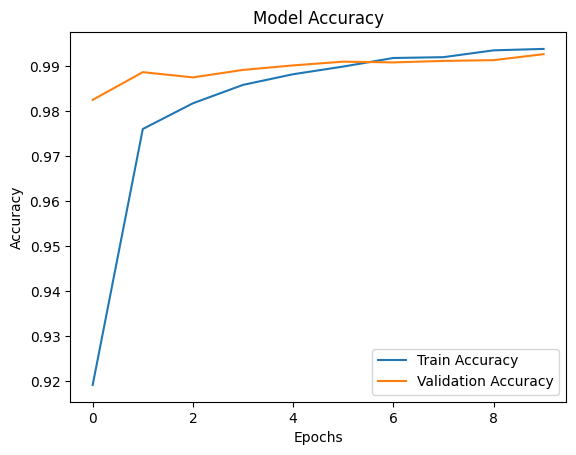

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


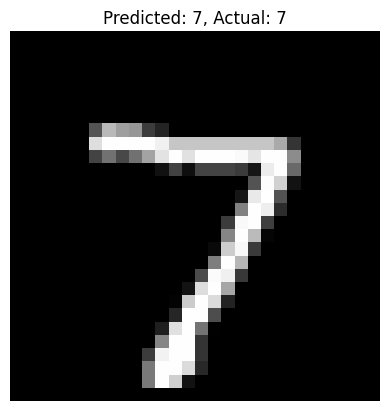

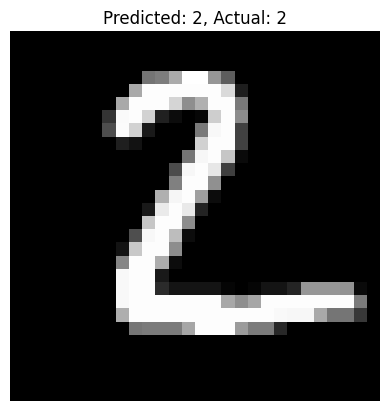

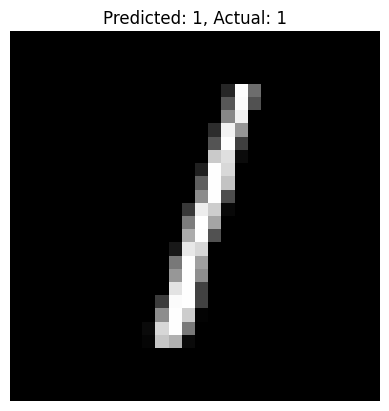

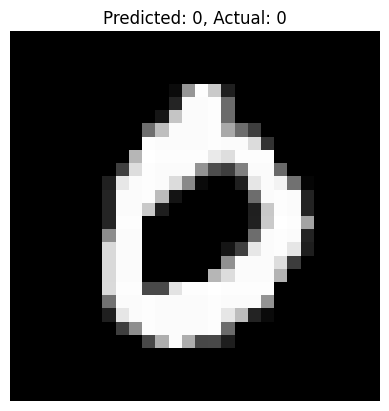

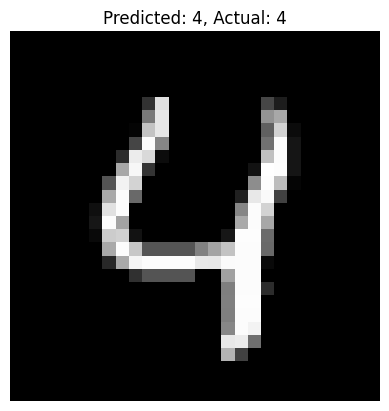

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical

# ---- Step 1: Load the dataset ----
train_data = pd.read_csv(r"C:\Users\HP\Downloads\dlecia2lab\mnist\mnist_train.csv"
)
test_data = pd.read_csv(r"C:\Users\HP\Downloads\dlecia2lab\mnist\mnist_test.csv"
)

# ---- Step 2: Separate features and labels ----
x_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values

x_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

# ---- Step 3: Normalize and reshape ----
x_train = x_train / 255.0
x_test = x_test / 255.0

# reshape to (28,28,1) for CNN input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# one-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# ---- Step 4: Build CNN Model ----
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ---- Step 5: Train ----
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

# ---- Step 6: Evaluate ----
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

# ---- Step 7: Plot training history ----
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ---- Step 8: Predict & visualize some examples ----
predictions = model.predict(x_test)

for i in range(5):
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {np.argmax(y_test[i])}")
    plt.axis('off')
    plt.show()
